<a href="https://colab.research.google.com/github/EgorMatveev26/Datasets/blob/main/%D0%9B%D0%A0_4_%D0%9A%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Описание датасета
Используемый набор данных содержит информацию о видах пингвинов и охватывает основные биологические показатели, такие как размеры клюва, масса и другие. Каждая строка представляет отдельного пингвина, а столбцы содержат следующие переменные:
- **species**: Вид пингвина
- **island**: Остров, на котором был найден пингвин
- **bill_length_mm**: Длина клюва в миллиметрах
- **bill_depth_mm**: Глубина клюва в миллиметрах
- **flipper_length_mm**: Длина плавника в миллиметрах
- **body_mass_g**: Масса пингвина в граммах
- **sex**: Пол пингвина (самец, самка)
- **year**: Год сбора данных

##Подготовка и анализ данных

In [343]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
pd.set_option('future.no_silent_downcasting', True)
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

In [344]:
# Присвоим переменной «url» ссылку на датасет:
url = 'https://raw.githubusercontent.com/EgorMatveev26/Datasets/refs/heads/main/palmerpenguins_original.csv'
# Создаем лист с названием столбцов:
cols = ['species', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']
# Используем Pandas read_csv():
dataset = pd.read_csv(url, names = cols)

In [345]:
# Отображаем первые 5 строк датасета
dataset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [346]:
# Проверка на отсутствующие значения
print(dataset.isnull().sum())
# Удаление строк с пропущенными значениями, если они есть
dataset.dropna(inplace=True)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64


In [347]:
# Выводим информацию о наборе данных - количество записей,
# количество ненулевых значений в каждом столбце, тип данных в столбце
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [348]:
# Извлекаем уникальные значения из столбца "species"-целевая переменная
vals = dataset["species"].unique()
vals

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [349]:
# Категориальные переменные кодируем в числовые
dataset = dataset.replace('female', 0).replace('male', 1).replace('Adelie', 0).replace('Gentoo', 1).replace('Chinstrap', 2)
dataset["island"] = dataset["island"].astype('category')
dataset["island_ind"] = dataset["island"].cat.codes
dataset["species"] = dataset["species"].astype(int)
dataset["sex"] = dataset["sex"].astype(int)

In [350]:
# Выводим информацию о датасете
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   species            333 non-null    int64   
 1   island             333 non-null    category
 2   bill_length_mm     333 non-null    float64 
 3   bill_depth_mm      333 non-null    float64 
 4   flipper_length_mm  333 non-null    float64 
 5   body_mass_g        333 non-null    float64 
 6   sex                333 non-null    int64   
 7   year               333 non-null    int64   
 8   island_ind         333 non-null    int8    
dtypes: category(1), float64(4), int64(3), int8(1)
memory usage: 21.6 KB


In [351]:
# Удаляем категориальные столбцы из датасета
df = dataset.drop(['island'], axis=1).copy()
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,island_ind
0,0,39.1,18.7,181.0,3750.0,1,2007,2
1,0,39.5,17.4,186.0,3800.0,0,2007,2
2,0,40.3,18.0,195.0,3250.0,0,2007,2
4,0,36.7,19.3,193.0,3450.0,0,2007,2
5,0,39.3,20.6,190.0,3650.0,1,2007,2


In [352]:
# Создаём датасет для 3-мерной визуализации
# Выбираем признаки: длина клюва, глубина клюва и длина плавника
new_df = df[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']].copy()
new_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm
0,39.1,18.7,181.0
1,39.5,17.4,186.0
2,40.3,18.0,195.0
4,36.7,19.3,193.0
5,39.3,20.6,190.0


In [353]:
# Y - целевая переменная, которую предсказываем. Мы ищем зависимость этой переменной от соответствующих столбцов. В нашем случае это столбец species.
# В X складываем набор данных из нового датасета без целевой переменной.
X = new_df
y = df['species']

# Нормализуем данные так, чтобы все значения находились в диапазоне от 0 до 1
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=new_df.columns, index=new_df.index)
# Посмотрим, как прошла нормализация
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm
0,0.254545,0.666667,0.152542
1,0.269091,0.511905,0.237288
2,0.298182,0.583333,0.389831
4,0.167273,0.738095,0.355932
5,0.261818,0.892857,0.305085


## Распространенные алгоритмы кластеризации


#### K-Means
K-Means на сегодняшний день является самым популярным алгоритмом кластеризации, учитывая, что его очень легко понять и применить к широкому спектру задач науки о данных и машинного обучения. Ниже описано, как можно применить алгоритм K-средних к задаче кластеризации.

Первым шагом является случайный выбор ряда кластеров, каждый из которых представлен переменной 'k'. Далее каждому кластеру присваивается центроид, т.е. центр этого конкретного кластера. Важно определить центроиды как можно дальше друг от друга, чтобы уменьшить вариацию. После того как все центроиды определены, каждая точка данных назначается кластеру, центроид которого находится на ближайшем расстоянии.

После того как все точки данных назначены соответствующим кластерам, центроид снова назначается для каждого кластера. Опять же, все точки данных перегруппировываются в определенные кластеры в зависимости от их расстояния от вновь определенных центроидов. Этот процесс повторяется до тех пор, пока центроиды не перестанут двигаться со своих позиций.

Алгоритм K-средних творит чудеса при группировке новых данных. Некоторые из практических применений этого алгоритма связаны с измерениями датчиков, обнаружением звука и сегментацией изображений.

Предположим, у нас  $N$ объектов и $K$ кластеров. Каждый кластер описывается его центром (centroid) с координатами $\mu_{j}$. Центроиды оцениваются путем минимизации **критерия расстояния внутри кластера**:

$$
L = \sum_{i=1}^{N} \min_{\mu_{k}} \rho(x_{i}, \mu_{k}) \to \min_{\mu_{1}, ..., \mu_{K}}
$$

$$
\rho(x_{i}, \mu_{k}) = || x_{i} - \mu_{k} ||^{2}
$$

где $x_{i}$ — координаты образца, $\rho(x_{i}, \mu_{k})$ — расстояние между $i$-м образцом и центроидом $k$-го кластера.

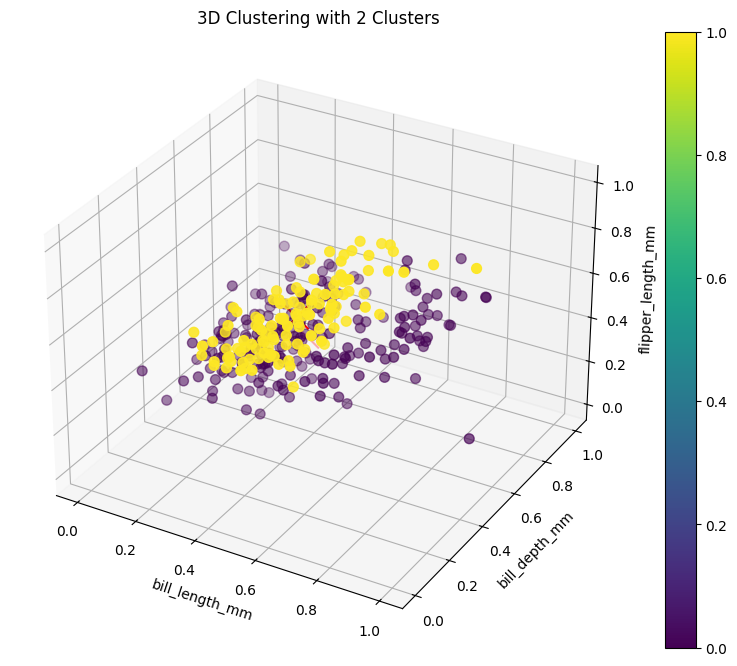

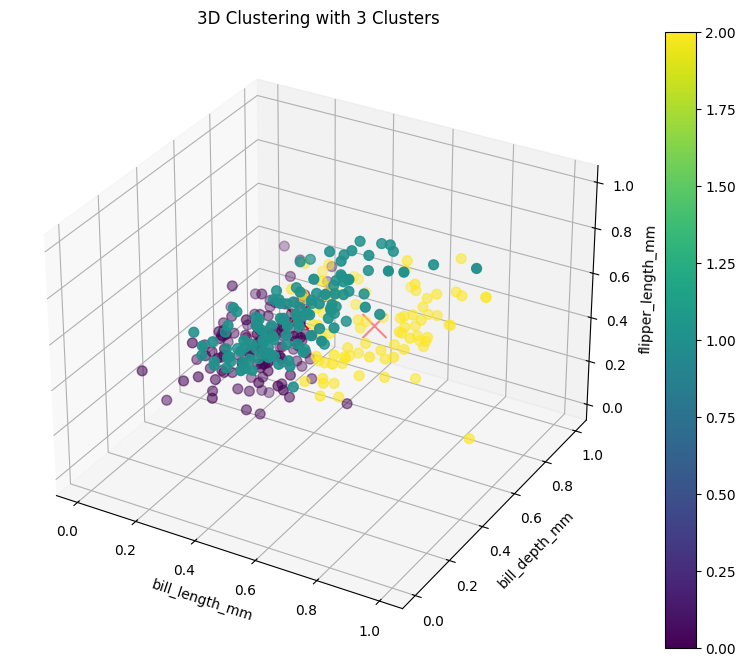

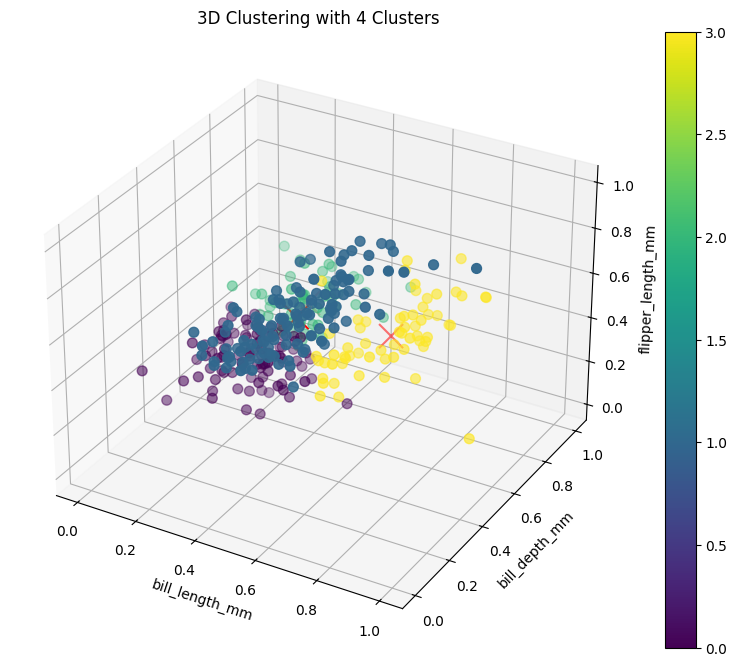

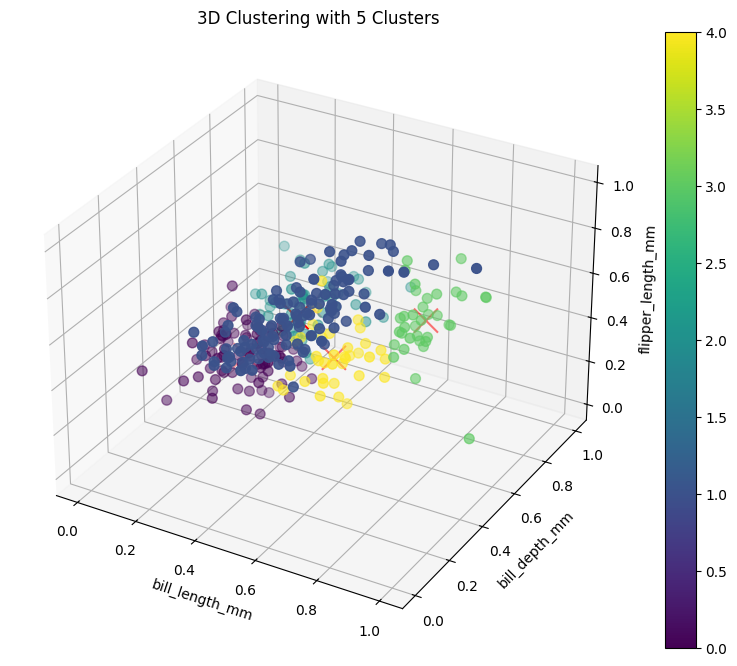

In [354]:
# Функция для 3D визуализации кластеров
def plot_clusters_3d(X, labels, centers=None, title="3D Clustering"):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X.iloc[:, 0], X.iloc[:, 1], X.iloc[:, 2], c=labels, cmap='viridis', s=50)

    if centers is not None:
        ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='red', s=300, marker='x')  # Центры кластеров

    ax.set_xlabel('bill_length_mm')
    ax.set_ylabel('bill_depth_mm')
    ax.set_zlabel('flipper_length_mm')
    ax.set_title(title)
    plt.colorbar(scatter)
    plt.show()

# Обучение KMeans для кластеров и визуализация результатов
def train_and_visualize_kmeans(X, k_values):
    clusterings = {}
    for k in k_values:
        # Инициализация и обучение модели KMeans
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)  # Предсказанные значения
        centers = kmeans.cluster_centers_
        clusterings[k] = (labels, centers)  # Центры кластеров

        # Визуализируем результаты для кластеров 2, 3, 4 и 5
        if k < 6:
            plot_clusters_3d(X.iloc[:, :3], labels, centers, title=f"3D Clustering with {k} Clusters")

# Задаем диапазон для количества кластеров и запускаем функцию
k_values = np.arange(2, 21)
train_and_visualize_kmeans(X, k_values)

## Метрики

Оценка производительности алгоритма кластеризации не так тривиальна, как подсчет количества ошибок или точности и полноты контролируемого алгоритма классификации. В частности, любая метрика оценки не должна принимать во внимание абсолютные значения меток кластера, а, скорее, если эта кластеризация определяет разделение данных, подобное некоторому базовому набору классов или удовлетворяющее некоторому предположению, например, что точки принадлежат к одному и тому же классу, они более похожи, чем представители разных классов по некоторой метрике сходства

**Оценка силуэта (Silhouette Score):**

Если основные истинные метки неизвестны, оценку необходимо выполнить с использованием самой модели. Коэффициент силуэта (sklearn.metrics.silhouette_score) является примером такой оценки, где более высокий балл коэффициента силуэта относится к модели с более четко определенными кластерами. Коэффициент силуэта определяется для каждого образца и состоит из двух баллов:

a: Среднее расстояние между образцом и всеми другими точками того же класса.

b: Среднее расстояние между образцом и всеми остальными точками в следующем ближайшем кластере.

Коэффициент силуэта s для одного образца определяется как:

$$
s = \frac{b - a}{max(a, b)}
$$

- **a**: Среднее расстояние между образцом и всеми другими точками в том же классе.
- **b**: Среднее расстояние между образцом и всеми другими точками в следующем ближайшем кластере.

Плюсы:
1. Оценка ограничена от -1 за неправильную кластеризацию до +1 за очень плотную кластеризацию. Оценки около нуля указывают на перекрывающиеся кластеры.

1. Оценка выше, когда кластеры плотные и хорошо разделены, что соответствует стандартному понятию кластера.

Минусы:
1. Коэффициент силуэта обычно выше для выпуклых кластеров, чем для других концепций кластеров, таких как кластеры на основе плотности, подобные тем, которые получены с помощью DBSCAN.

**Скорректированный индекс Рэнда (Adjusted Rand Index, ARI):**
Индекс Рэнда с поправкой на случайность.

Индекс Рэнда вычисляет меру сходства между двумя кластеризациями, рассматривая все пары выборок и подсчитывая пары, которые назначены в одни и те же или разные кластеры в предсказанной кластеризации и кластеризации true .

Затем необработанный показатель RI «корректируется на случайность» в показатель ARI по следующей схеме:

$$
ARI = \frac{RI - Ожидаемый\_RI}{max(RI) - Ожидаемый\_RI}
$$

$$
RI = \frac{a + b}{a + b + c + d}
$$

- a, количество пар элементов в S, которые находятся в одном подмножестве в X и в одном подмножестве в Y
- b, количество пар элементов в S, которые находятся в разных подмножествах в X и в разных подмножествах в Y
- c, количество пар элементов в S, которые находятся в одном подмножестве в X и в разных подмножествах в Y
- d, количество пар элементов в S, которые находятся в разных подмножествах в X и в одном подмножестве в Y

Таким образом, обеспечивается значение скорректированного индекса Рэнда, близкое к 0,0 для случайной маркировки независимо от количества кластеров и выборок, и ровно 1,0, когда кластеризации идентичны (с точностью до перестановки).

Оценка сходства между -1,0 и 1,0. Случайные метки имеют ARI, близкий к 0,0. 1.0 означает идеальное совпадение.

In [355]:
n_clusters = np.arange(2, 21)
# Поиск лучших параметров
best_metric = [0, 1, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)
    # Силуэтная оценка
    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)
    # Скорректированная случайная оценка
    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n

# Выводим лучщие метрики
best_metric

[3,
 0.4801570151556243,
 0.8898524171665104,
 array([[0.60805195, 0.66360544, 0.42324455],
        [0.23967172, 0.60987103, 0.29602166],
        [0.56247517, 0.22579032, 0.7666999 ]])]

##Выводы:
После анализа значений силуэтной оценки и скорректированной случайной оценки, наилучшие результаты были достигнуты при количестве кластеров, равном n = 3.

Силуэтная оценка для k = 3 составила 0.4801, что указывает на умеренное качество кластеризации. Значение выше 0.5 обычно считается хорошим.

Скорректированная случайная оценка составила 0.8899, что подразумевает высокую степень согласия между предсказанными метками кластеров и истинными метками. Значение близкое к 1 говорит о том, что кластеризация хорошо соответствует реальным группам в данных.

Центры кластеров были найдены на координатах:
- Кластер 1: [0.2397, 0.6099, 0.2960]
- Кластер 2: [0.5625, 0.2258, 0.7667]
- Кластер 3: [0.6081, 0.6636, 0.4232]

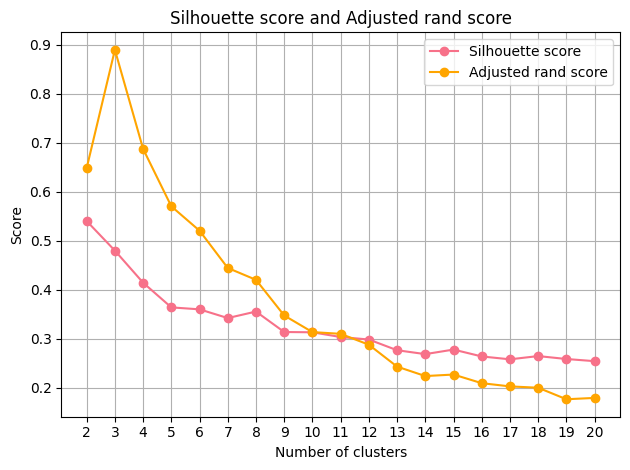

In [356]:
# График силуэтных и случайных оценок
plt.plot(n_clusters, silhouette_score_values, marker='o', label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, marker='o', color='orange', label='Adjusted rand score')
plt.title('Silhouette score and Adjusted rand score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.xticks(np.arange(min(k_values), max(k_values) + 1, 1))

plt.tight_layout()
plt.show()

##Выводы:
Оба показателя (силуэтная оценка - 0.48 и скорректированная случайная оценка - 0.89) показывают наилучшие результаты при 3 кластерах. Для дальнейшего анализа будем использовать данное количество кластеров, так как это значение обеспечивает оптимальное качество кластеризации.

## Иерархическая кластеризация

Иерархическая кластеризация, как следует из названия, представляет собой алгоритм, который строит иерархию кластеров. Этот алгоритм начинает работу с того, что каждому экземпляру данных сопоставляется свой собственный кластер. Затем два ближайших кластера объединяются в один и так далее, пока не будет образован один общий кластер.

Иерархическая кластеризация требует создания кластеров, которые имеют предопределенный порядок сверху вниз. Это тип алгоритма неконтролируемого машинного обучения, используемый для кластеризации немаркированных точек данных.

Что делать?

1. Каждую точку данных следует изначально рассматривать как кластер.
1. Обозначим количество кластеров в начале как K.
1. Сформируйте один кластер, объединив две ближайшие точки данных, в результате чего получатся кластеры K-1.
1. Образуйте больше кластеров, объединив два ближайших кластера, в результате чего получатся кластеры K-2.
1. Повторяйте четыре вышеуказанных шага, пока не будет создан один большой кластер.
1. Дендрограммы используются для разделения на несколько кластеров сразу после создания кластера.

**Типы иерархической кластеризации**

1. Разделительная кластеризация
Разделительная кластеризация, также известная как метод кластеризации сверху вниз, относит все наблюдения к одному кластеру, а затем разделяет кластер на два наименее похожих кластера.

2. Агломеративная кластеризация
В методе агломеративной или восходящей кластеризации каждое наблюдение относится к своему собственному кластеру.

**Алгоритмы**
1. Одинарное соединение (single)
Кластеризация с одиночной связью часто дает кластеры, в которых индивидуумы последовательно добавляются в одну группу. Расстояние между двумя кластерами определяется как расстояние между двумя ближайшими точками данных.

1. Полная связь (complete)
Полная кластеризация связей обычно дает кластеры, которые хорошо разделены и компактны. Расстояние между двумя кластерами определяется как самое длинное расстояние между двумя точками данных в каждом кластере.

1. Среднее арифметическое (simple avarage)

Простой алгоритм усреднения определяет расстояние между кластерами как среднее расстояние между каждым из членов, взвешенное таким образом, чтобы два кластера имели одинаковое влияние на конечный результат.


**Дендрограмма**
Дендрограмма — это древовидная диаграмма, используемая для визуализации взаимосвязи между кластерами. Чем больше расстояние между вертикальными линиями в дендрограмме, тем больше расстояние между этими кластерами. Ключ к интерпретации дендрограммы — сосредоточиться на высоте, на которой любые два объекта соединяются вместе.

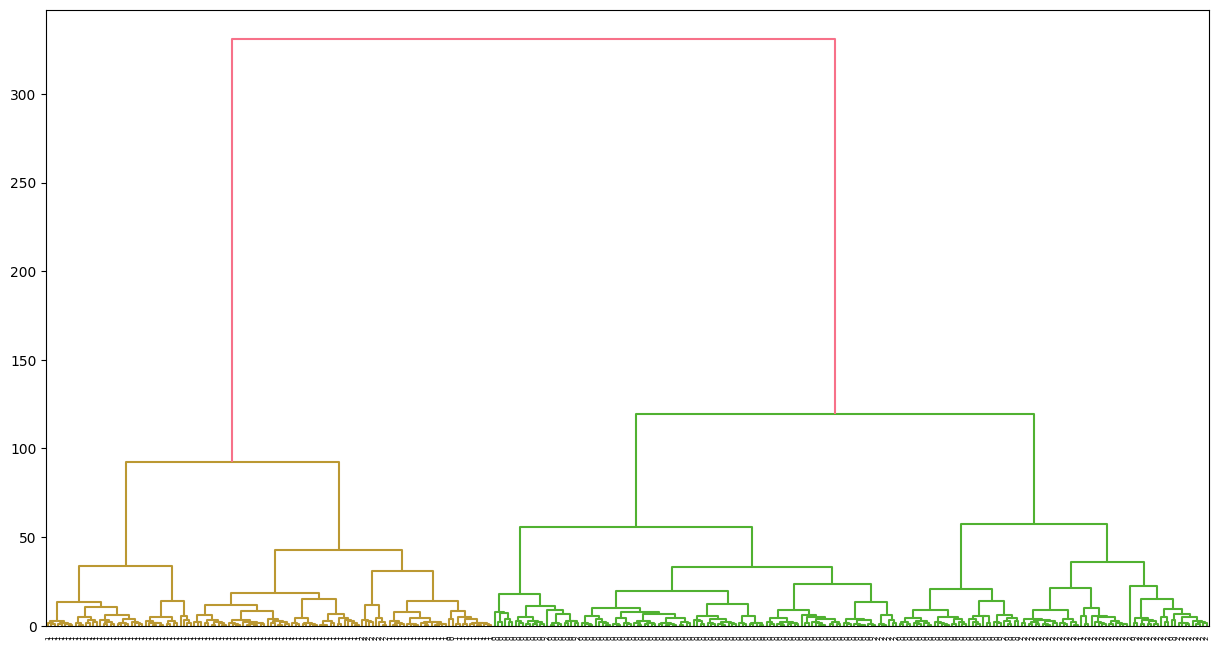

In [357]:
from scipy.cluster.hierarchy import linkage, dendrogram
samples = new_df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')
# попробуйте с другими методами

plt.figure(figsize=(15, 8))
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5,
           )

plt.show()

## DBSCAN
***Пространственная кластеризация приложений с шумом на основе плотности***



Методы разбиения (K-средние, кластеризация PAM) и иерархическая кластеризация работают для поиска кластеров сферической формы или выпуклых кластеров. Другими словами, они подходят только для компактных и хорошо разделенных кластеров. Кроме того, на них также сильно влияет наличие шума и выбросов в данных.

Реальные данные могут содержать несоответствия, такие как:

1. Кластеры могут иметь произвольную форму.
1. Данные могут содержать шум.

Параметры, необходимые для алгоритма DBSCAN
1. eps: Он определяет окрестности вокруг точки данных, т.е. если расстояние между двумя точками меньше или равно 'eps', то они считаются соседями. Если значение eps выбрано слишком маленьким, то большая часть данных будет рассматриваться как выброс. Если выбран очень большой, то кластеры объединятся, и большинство точек данных будут находиться в одних и тех же кластерах. Один из способов найти значение eps основан на графике k-расстояния.
1. MinPts: Минимальное количество соседей (точек данных) в радиусе eps. Чем больше набор данных, тем большее значение MinPts должно быть выбрано. Как правило, минимальное количество MinPts может быть получено из числа измерений D в наборе данных следующим образом: MinPts >= D+1. Минимальное значение MinPts должно быть выбрано не менее 3.

**Алгоритм DBSCAN**
1. Найдите все соседние точки в eps и определите центральные точки или посещенные с более чем MinPts соседями.
1. Для каждой точки ядра, если она еще не назначена кластеру, создайте новый кластер.
1. Рекурсивно находит все его точки, связанные по плотности, и назначает их тому же кластеру, что и центральная точка.
1. Точки a и b считаются плотно связанными, если существует точка c, которая имеет достаточное количество точек в своих окрестностях и обе точки a и b находятся в пределах расстояния eps. Это цепной процесс. Таким образом, если b является соседом c, c является соседом d, а d является соседом e, который, в свою очередь, является соседом a, подразумевая, что b является соседом a.
1. Выполните итерацию по оставшимся непосещенным точкам в наборе данных. Те точки, которые не принадлежат ни к одному кластеру, являются шумом.

['y', 'b', 'g', 'r']


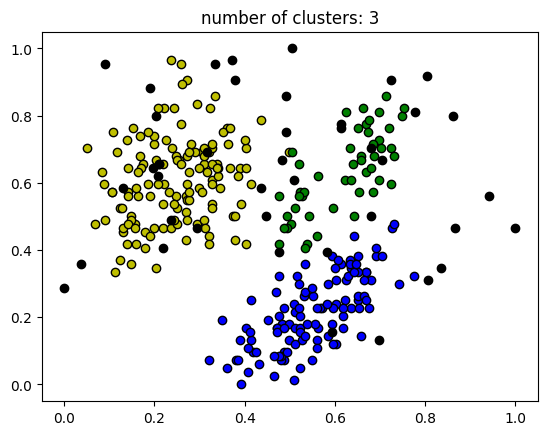

In [358]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets


# Определяем количество признаков в наборе данных X
mins = X.shape[1]

# Выполняем кластеризацию методом DBSCAN с параметрами eps и min_samples
db = DBSCAN(eps=0.1, min_samples=7).fit(X)

# Создаем маску для основных (ядровых) образцов
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Получаем метки кластеров
labels = db.labels_

# Определяем количество кластеров, исключая шум (метка -1)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Получаем уникальные метки кластеров
unique_labels = set(labels)

# Задаем цвета для каждой метки кластера
colors = ['y', 'b', 'g', 'r']
print(colors)

# Проходимся по уникальным меткам и раскрашиваем их
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Черный цвет используется для отображения шума
        col = 'k'

    # Создаем маску для объектов, принадлежащих текущему кластеру и являющихся ядровыми
    class_member_mask = (labels == k)

    # Строим график для ядровых образцов текущего кластера
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy["bill_length_mm"], xy["bill_depth_mm"], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

    # Строим график для выбросов текущего кластера
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy["bill_length_mm"], xy["bill_depth_mm"], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

# Устанавливаем заголовок графика с указанием числа кластеров
plt.title('number of clusters: %d' % n_clusters_)

# Отображаем график
plt.show()

##Выводы:
Чтобы получить 3 кластера, были выбраны следующие параметры: eps=0.1 и min_samples=7.
- eps = 0.1 указывает, что для образования кластера объекты должны находиться на расстоянии не более 0.1 друг от друга.
- min_samples = 7 указывает, что для образования кластера необходимо минимум 7 точек, находящихся в пределах этого расстояния.

Учитывая эти параметры, алгоритм будет искать группы точек, которые формируют 3 четко выделенных кластера.

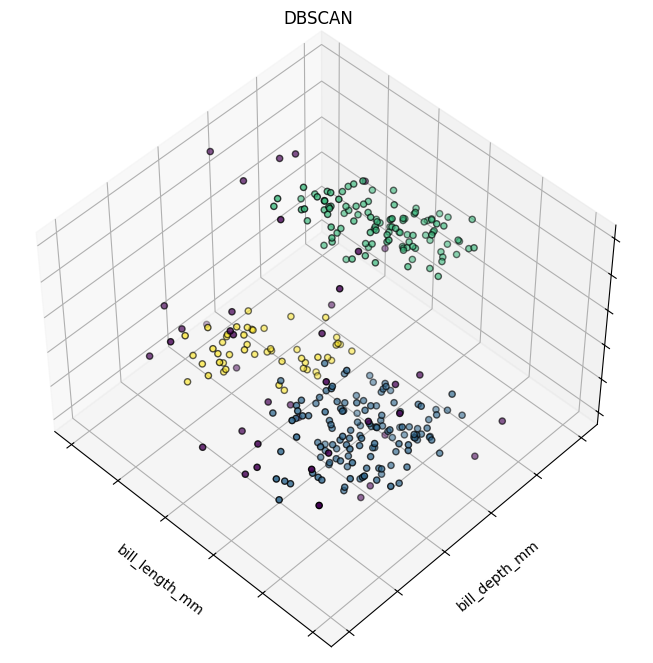

In [359]:
# Визуализация DBSCAN
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

ax.scatter(X["bill_length_mm"], X["bill_depth_mm"], X["flipper_length_mm"], c=labels.astype(float), edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("bill_length_mm")
ax.set_ylabel("bill_depth_mm")
ax.set_zlabel("flipper_length_mm")
ax.set_title("DBSCAN")

plt.show()

Для оценки алгоритмов кластеризации мы будем использовать оценку силуэта и оценку скорректированного рэнда. Оценка Silhouette находится в диапазоне от -1 до 1. Оценка около 1 означает, что точка данных i очень компактна в пределах кластера, к которому она принадлежит, и удалена от других кластеров. Худшее значение — -1. Значения, близкие к 0, обозначают перекрывающиеся кластеры.

Абсолютный показатель Rand Score находится в диапазоне от 0 до 1. Больше 0,9 означает отличное кластерное восстановление, а выше 0,8 — хорошее восстановление. Менее 0,5 считается плохим восстановлением.

In [360]:
# Оценочные показатели
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:0.40
Adjusted Rand Index: 0.77


##Выводы:
Коэффициент силуэта (Silhouette Coefficient: 0.40): данное значение указывает на то, что кластеры имеют умеренную внутреннюю компактность и частично перекрываются.

Скорректированный индекс рэнда (Adjusted Rand Index: 0.77): данное значение находится в категории хорошего восстановления кластеров. Это означает, что кластеризация в значительной степени соответствует действительным меткам классов, с которыми можно было бы сравнить результаты, что свидетельствует о неплохой согласованности между кластеризацией и истинными классами.